In [1]:
import numpy as np
from tqdm import tqdm
from utilities import load_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.style.use("dark_background")

In [2]:
X_train, y_train, X_test, y_test = load_data()

In [3]:
print("Train")
print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

print("\nTest")
print(X_test.shape, y_test.shape)
print(np.unique(y_test, return_counts=True))

Train
(1000, 64, 64) (1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))

Test
(200, 64, 64) (200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


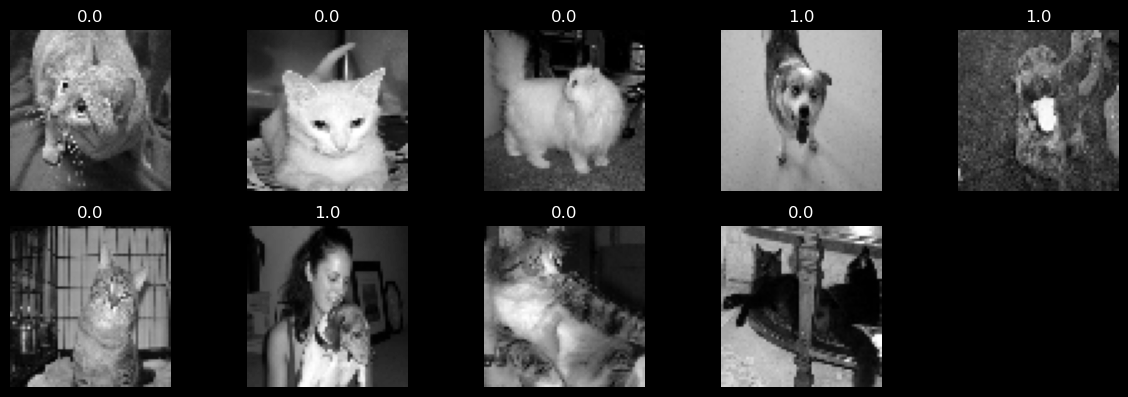

In [4]:
plt.figure(figsize=(12, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i][0])
    plt.axis("off")
    plt.tight_layout()
plt.show()

In [5]:
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [6]:
X_train_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

In [7]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def log_loss(A, y):
    epsilon = 1e-15
    return -1 / len(y) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))

def gradients(A, X, y):
    dW = 1 / len(y) * X.T.dot(A - y)
    db = 1 / len(y) * np.sum(A - y)
    return dW, db

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

100%|██████████| 10000/10000 [00:48<00:00, 208.25it/s]


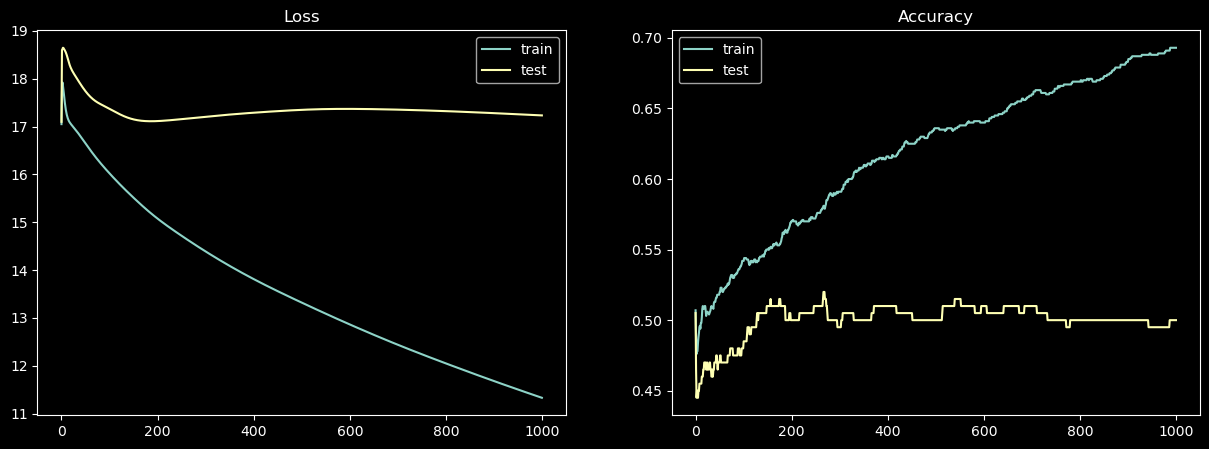

In [8]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    # Initialisation
    W, b = initialization(X_train)

    # Boucle d'apprentissage
    history = []
    
    loss_train = []
    loss_test = []
    
    accuracy_train = []
    accuracy_test = []

    for i in tqdm(range(n_iter)):
        A_train = model(X_train, W, b)
        A_test = model(X_test, W, b)

        if i % 10 == 0:
            loss_train.append(log_loss(y_train, A_train))
            loss_test.append(log_loss(y_test, A_test))
            
            y_train_pred = predict(X_train, W, b)
            accuracy_train.append(accuracy_score(y_train, y_train_pred))

            y_test_pred = predict(X_test, W, b)
            accuracy_test.append(accuracy_score(y_test, y_test_pred))
        dW, db = gradients(A_train, X_train, y_train)
        
        W, b = update(dW, db, W, b, learning_rate)
        history.append([W, b, loss_train, i])

    _, ax = plt.subplots(1, 2, figsize=(15, 5))

    ax[0].plot(loss_train, label="train")
    ax[0].plot(loss_test, label="test")
    ax[0].legend()
    ax[0].set_title("Loss")

    ax[1].plot(accuracy_train, label="train")
    ax[1].plot(accuracy_test, label="test")
    ax[1].legend()
    ax[1].set_title("Accuracy")
    
    return history

history = artificial_neuron(X_train_flattened, y_train, X_test_flattened, y_test, learning_rate=0.01, n_iter=10000)

In [9]:
W, b, _, _ = history[-1]

y_train_pred = predict(X_train_flattened, W, b)
y_test_pred = predict(X_test_flattened, W, b)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.693
0.5
